In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define an arbitary scalar-valued function
# Takes a single scalar value `x` and returns a single scalar value `y`
def f(x):
    y = 3*x**2 - 4*x + 5
    return y

In [3]:
# Should return 20.0
f(3.0)

20.0

In [4]:
# Plot the function f(x)
# Create the x-values for the plot, from -5 to 5, with step 0.25
xs = np.arange(-5, 5, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [5]:
# We can get the y-values of the function by passing in the list of x-values
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

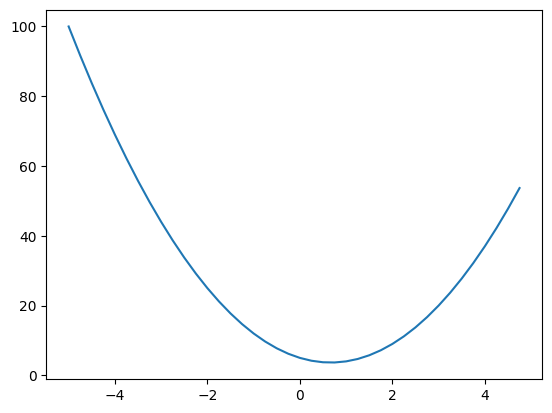

In [6]:
# Plot the function, which should be a parabola
plt.plot(xs, ys)

## Derivative
The **derivative** tells us how much an output value `y` of the function `f()` changes as the input `x` changes.

Does the function go up? Or down? By how much? The **slope** describes how fast this change is.

What is the derivative at any x-coordinate in this graph?

In [7]:
# For small values `h` added onto input `x`, how much does `y` change?
h = 0.001
x = 3.0
f(x)

20.0

In [8]:
# How much does the function change with small changes added to x?
# By looking at the plot above, we'd expect the result to be slightly higher than 20.0
f(x + h)

20.014003000000002

In [9]:
# By how much did the function changes?
f(x + h) - f(x)

0.01400300000000243

In [10]:
# To get the slope, we normalize the difference
# At x = 3, the slope is ~14
(f(x + h) - f(x)) / h

14.00300000000243

In [11]:
# We could verify our answer by mathematically computing the derivative of f
def df_dx(x):
    y = 6*x - 4
    return y

In [12]:
x = 3.0
df_dx(x)

14.0

In [13]:
# What about negative 3? If we look at the plot above, if we move in the positive direction (starting from x=-3), the value y goes down
# So we'd expect the sign of the slope to be negative
h = 0.00000001
x = -3.0
(f(x + h) - f(x)) / h

-22.00000039920269

In [14]:
# If the slope is zero, the function's value does not change if you change the input value by a little
# This happens at x=2/3
x = 2/3
(f(x + h) - f(x)) / h

0.0

In [15]:
# Les get more complex
# We should get 4 here
a = 2.0
b = -3.0
c = 10.0
# Now we have a function here, with output variable `d`, that is function of three scalar inputs, a, b, and c
d = a*b + c
print(d)

4.0


Let's now look at the deriative of `d` with respect to each of its inputs: `a`, `b` and `c`

In [16]:
h = 0.0001

a = 2.0
b = -3.0
c = 10.0

# Let's nudge `a` by a little bit `h`
d1 = a*b + c
d2 = (a+h)*b + c

print("d1: ", d1)
print("d2: ", d2)
print("slope: ", (d2 - d1)/h)

# The slope should be -3. We can verify by taking the derivative of the function manually, which is dd_da = b = -3.0

d1:  4.0
d2:  3.999699999999999
slope:  -3.000000000010772


In [17]:
# Let's nudge `b` by a little bit `h`
d1 = a*b + c
d2 = a*(b+h) + c

print("d1: ", d1)
print("d2: ", d2)
print("slope: ", (d2 - d1)/h)

d1:  4.0
d2:  4.0002
slope:  2.0000000000042206


In [18]:
# Let's nudge `c` by a little bit `h`
d1 = a*b + c
d2 = a*b + (c+h)

print("d1: ", d1)
print("d2: ", d2)
print("slope: ", (d2 - d1)/h)

# The slope should be roughly 1, which tells us that the function increases by the amount that we added, which is 0.001

d1:  4.0
d2:  4.0001
slope:  0.9999999999976694


## Implement the `Value` class

In [19]:
from typing import Union

class Value:
    # By default, `_children` will be an empty tuple
    # `_children` is a set of Value objects that create this Value object
    # ex) c = a + b, the children of Value(c) = Value(a) and Value(b)
    # `_op` is the mathematical operation (as a string) that created this Value
    # ex) `+` would be the operation
    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        # Gradient, how much does this value affect the final output
        # Is calculated later, in relation to other values
        self.grad = 0
        # Function that applies the chain rule
        # How to compute the childrens' gradients using the node's gradient
        self._backward = lambda: None
        
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    # What gets printed to the notebook screen when you return it
    def __repr__(self):
        return f"Value(label={self.label}, data={self.data})"
    
    def __neg__(self):
        return self * -1
    
    def __add__(self, other):
        # If the value is a float or integer, convert it to a Value object
        other = other if isinstance(other, Value) else Value(other)
        
        out = Value(self.data + other.data, _children=(self, other), _op='+')
        
        # Define the chain rule for addition
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        
        out._backward = _backward
        return out

    def __sub__(self, other):
        return self + (-other)
    
    def __radd__(self, other):
        return self + other
    
    def __mul__(self, other):
        # If the value is a float or integer, convert it to a Value object
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, _children=(self, other), _op='*')
        
        # Define the chain rule for multiplication
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        
        out._backward = _backward
        return out

    def __rmul__(self, other):
        return self * other
    
    # Division is just a special case of raising a value by a negative number
    def __truediv__(self, other):
        return self * other**-1
    
    # self^int
    def __pow__(self, other: Union[int, float]):
        assert(isinstance(other, int) or isinstance(float))
        out = Value(self.data**other, _children=(self,), _op=f'^{other}')
        
        # Define the chain rule for power
        def _backward():
            self.grad += (other * (self.data**(other-1))) * out.grad
        
        out._backward = _backward
        return out
    
    def tanh(self):
        # https://en.wikipedia.org/wiki/Hyperbolic_functions#Exponential_definitions
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, _children=(self,), _op='tanh')
        
        # Define the chain rule for tanh
        def _backward():
            self.grad += (1 - t**2) * out.grad
        
        out._backward = _backward
        return out
    
    # Computes e^x, where x=self.data
    def exp(self):
        x = self.data
        out = Value(math.exp(x), _children=(self,), _op='exp')
        
        def _backward():
            self.grad += math.exp(x) * out.grad
        
        out._backward = _backward
        return out
    
    # Computes the gradients of all the nodes in this graph
    def backward(self):
        # Set the root's gradient to one
        self.grad = 1.0

        # Create a list where the nodes are added from children to root
        topo = []
        visited = []
        def topo_sort(sorted_list: list, node: Value):
            if node in visited:
                return
            
            # Mark as visited
            visited.append(node)
            
            # If it is a leaf node
            if not node._prev:
                sorted_list.append(node)
                return

            # Add all the children
            for child in node._prev:
                topo_sort(sorted_list, child)

            # Add yourself after all the children have been added
            sorted_list.append(node)

        topo_sort(topo, self)

        for node in reversed(topo):
            node._backward()

In [20]:
a = Value(2.0, label='a')
a

Value(label=a, data=2.0)

In [21]:
b = Value(-3, label='b')
b

Value(label=b, data=-3)

In [22]:
# Equivalent to a.__add__(b)
a + b

Value(label=, data=-1.0)

In [23]:
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label='d'
f = Value(-2.0, label='f')
# The final output of our graph
L = d * f; L.label = 'L'
L

Value(label=L, data=-8.0)

In [24]:
# Print out the child nodes of the final expression
d._prev

{Value(label=c, data=10.0), Value(label=e, data=-6.0)}

In [25]:
d._op

'+'

In [26]:
import graphviz

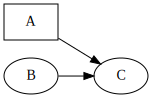

In [27]:
# Digraph means "directed graph"
dot = graphviz.Digraph(comment='my first graph')
dot.graph_attr['rankdir'] = 'LR'
dot.node('A', "A", shape="box")
dot.node('B', "B")
dot.node('C', "C")
dot.edges(['BC'])
dot.edge('A', 'C', constraint='false')
dot

In [28]:
def draw_sub_graph(visited, graph, value):
    if value in visited:
        return
    
    # Mark as visited
    visited.append(value)
    
    # Create a Value node
    value_id = str(id(value))
    graph.node(value_id, "{ %s | %.4f | grad=%.4f}" % (value.label, value.data, value.grad), shape="record")
    
    if len(value._prev) == 0:
        return
    
    # Create a node for the Operation
    op = value._op
    op_id = str(id(value)) + op
    graph.node(op_id, op)
    
    # Connect value to operation
    graph.edge(op_id, value_id)
    
    # Build the child graphs and attach to this node
    for child in value._prev:
        draw_sub_graph(visited, graph, child)
        child_node_id = str(id(child))
        graph.edge(child_node_id, op_id)
    
    return graph
    
# Draws a visualization of the mathematical expression
# `root` is the final value of the expression
# ex) L = a*b + c, L is the root
def draw_graph(root: Value):
    dot = graphviz.Digraph(comment=f"{root.label}")
    dot.graph_attr["rankdir"] = "LR"
    visited = []
    return draw_sub_graph(visited, dot, root)

In [29]:
# Represents the Loss function
L
# Manually fill in the gradients computed below
L.grad = 1

# dL/dd = f
# dL/df = d
d.grad = -2
f.grad = 4

# By the chain rule, dL/dc = dL/dd * dd/dc ; dd/dc = 1.0 (since `d` is computed by `+`), and dL/dd = -2.0
c.grad = -2.0
e.grad = -2.0

# By chain rule, dL/da = dL/de * de/da
# e = a * b
# de/da = b
a.grad = -2 * -3
# dL/db = dL/de * de/db
# e = a * b
# de/db = a
b.grad = -2 * 2

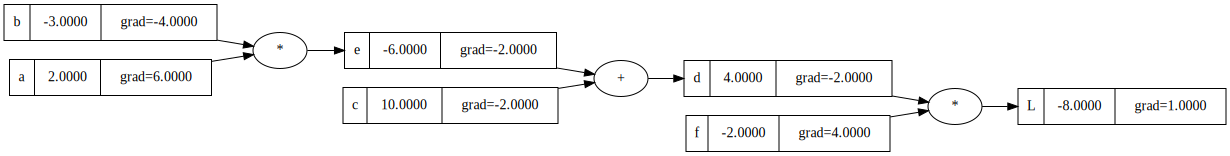

In [30]:
draw_graph(L)

In [31]:
# Playground to see how much changing a single value effects the final output L
def lol():
    h = 0.0001
    
    a = Value(2.0, label='a')
    b = Value(-3, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    # L is a Value node, so we need it's data
    L1 = L.data
    
    # Add a tiny change to the variable
    a = Value(2.0, label='a')
    b = Value(-3, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label='d'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data
    
    # Derivative
    print((L2 - L1) / h)

In [32]:
lol()

0.0


In [33]:
# Let's try to make L go up
# The gradients of each variable tells us which direction to go
# If we nudge the values in the direction of the gradient, L should go up
# Collect the leaf nodes, since we have direct control over those
h = 0.01
a.data += h * a.grad
b.data += h * b.grad
c.data += h * c.grad
f.data += h * f.grad

e = a*b; e.label = 'e'
d = e + c; d.label='d'
# The final output of our graph
L = d * f; L.label = 'L'
print(L.data)

-7.286496


## Back Propagation on a NN

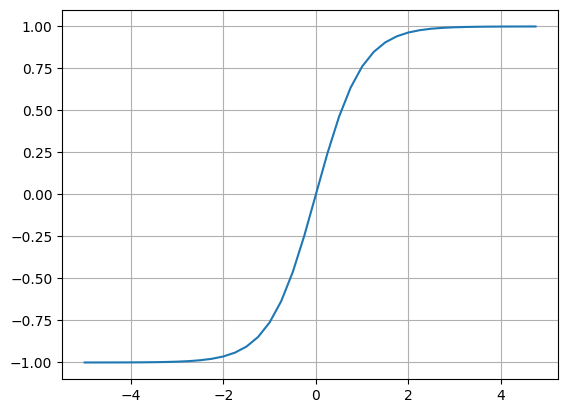

In [34]:
# Use tanh as an activation function
# This squishes the function between -1 and 1
xs = np.arange(-5, 5, 0.25)
ys = np.tanh(xs)
plt.plot(xs, ys); plt.grid();

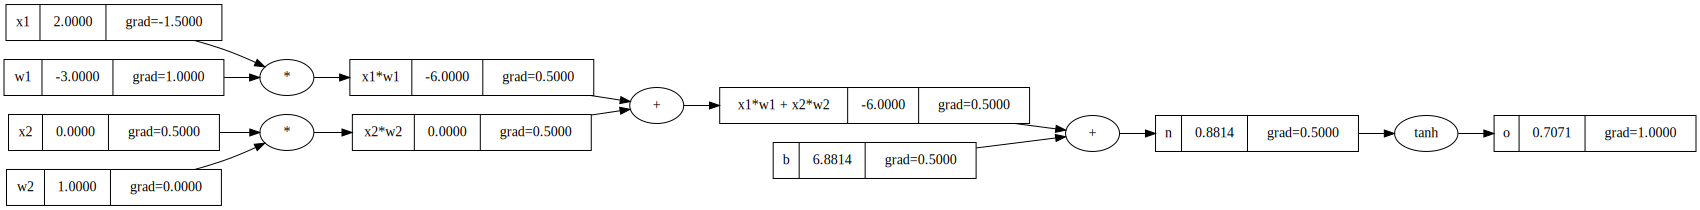

In [35]:
# Setup the neuron
# Inputs to the neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights of the neuron, these are the "synaptic strengths" of each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Bias
bias_value = 6.8813735870195432
b = Value(bias_value, label='b')

# Do a pass-through the neuron
# Multiply each input by its weight
x1w1 = x1 * w1; x1w1.label = "x1*w1"
x2w2 = x2 * w2; x2w2.label = "x2*w2"

# Add them together
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"

# Add the bias
# This is the value before the activation function is applied
n = x1w1x2w2 + b; n.label = 'n'

# Apply the activation function
o = n.tanh(); o.label='o';

# Apply back propagation and draw!
o.backward()
draw_graph(o)

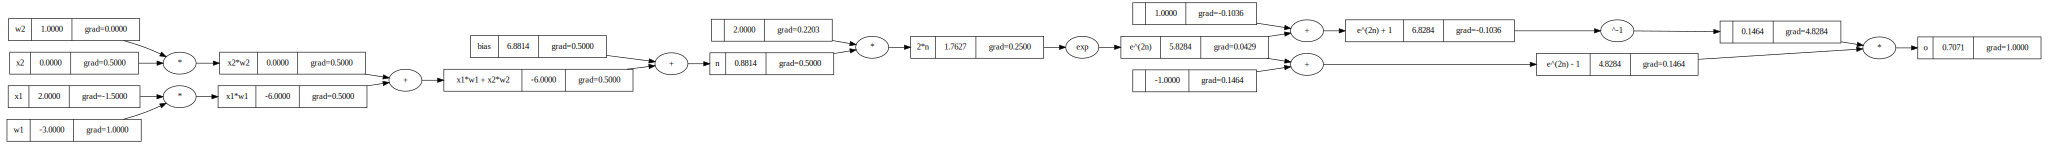

In [36]:
# Setup the neuron
# Inputs to the neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights of the neuron, these are the "synaptic strengths" of each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Bias
bias_value = 6.8813735870195432
bias = Value(bias_value, label='bias')

# Do a pass-through the neuron
# Multiply each input by its weight
x1w1 = x1 * w1; x1w1.label = "x1*w1"
x2w2 = x2 * w2; x2w2.label = "x2*w2"

# Add them together
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"

# Add the bias
# This is the value before the activation function is applied
n = x1w1x2w2 + bias; n.label = 'n'

# Rewrite the original tanh function!
# ---
a = 2*n; a.label = '2*n';
b = a.exp(); b.label = 'e^(2n)'
c = b - 1; c.label='e^(2n) - 1'
d = b + 1; d.label='e^(2n) + 1'
o = c / d; o.label='o'
#---

# Apply back propagation and draw!
o.backward()
draw_graph(o)

Compute the gradients after Topological Sort

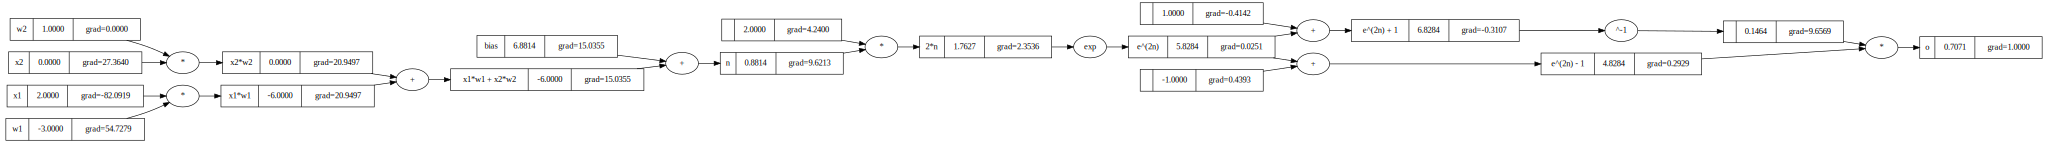

In [37]:
# Set the root's gradient to one
o.grad = 1.0

# Create a list where the nodes are added from children to root
topo = []
def topo_sort(sorted_list: list, node: Value):
    # If it is a leaf node
    if not node._prev:
        sorted_list.append(node)
        return
    
    # Add all the children
    for child in node._prev:
        topo_sort(sorted_list, child)
    
    # Add yourself after all the children have been added
    sorted_list.append(node)
    
topo_sort(topo, o)

for node in reversed(topo):
    node._backward()

draw_graph(o)

Compute the gradient using the main `backward()` method

In [38]:
o.backward()

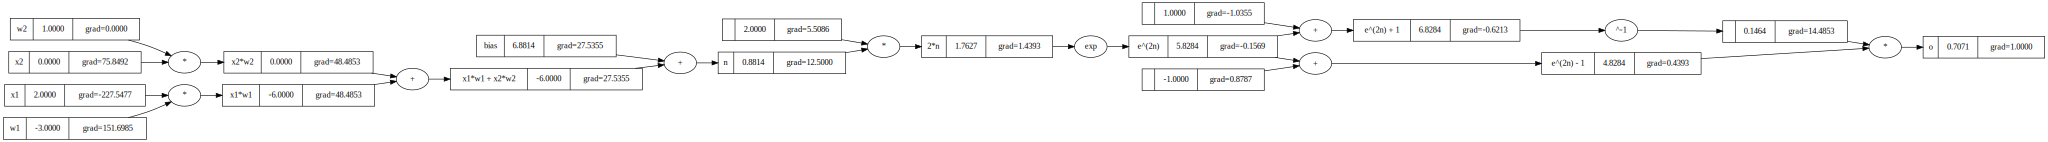

In [39]:
draw_graph(o)

Compute the gradients using the `_backward()` method

In [40]:
# Initialize the first gradient to one
o.grad = 1.0

In [41]:
o._backward()

In [42]:
n._backward()

In [43]:
# Nothing should happen since it is a leaf node; a lambda: None -> backward was never defined
b._backward()

In [44]:
x1w1x2w2._backward()

In [45]:
x2w2._backward()
x1w1._backward()

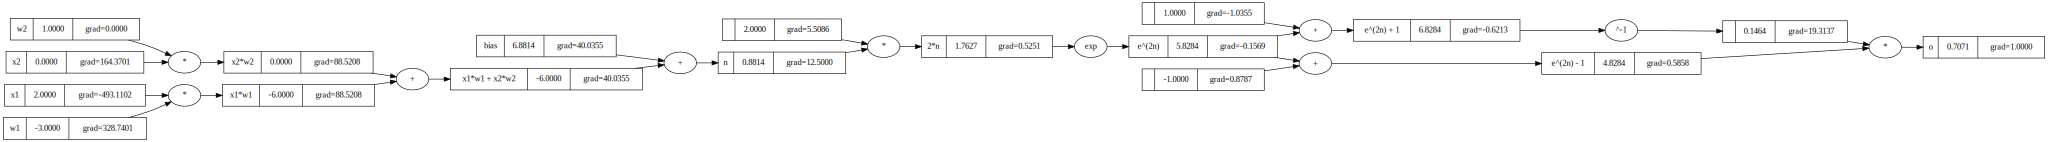

In [46]:
draw_graph(o)

Manually calculate and fill in the gradients

In [47]:
# The base case, do/do = 1.0
# o = tanh(n)
# What is do/dn?
# The derivative of tanh(x) = 1 - tanh(x)**2
# 1 - (o.data ** 2)
o.grad = 1.0
n.grad = 0.5

# The plus operator simply passes the parent's derivative to its children
x1w1x2w2.grad = 0.5
b.grad = 0.5

x1w1.grad = 0.5
x2w2.grad = 0.5

# For mutiply, the derivative is simply the sibling node's value times the parent's gradient
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad

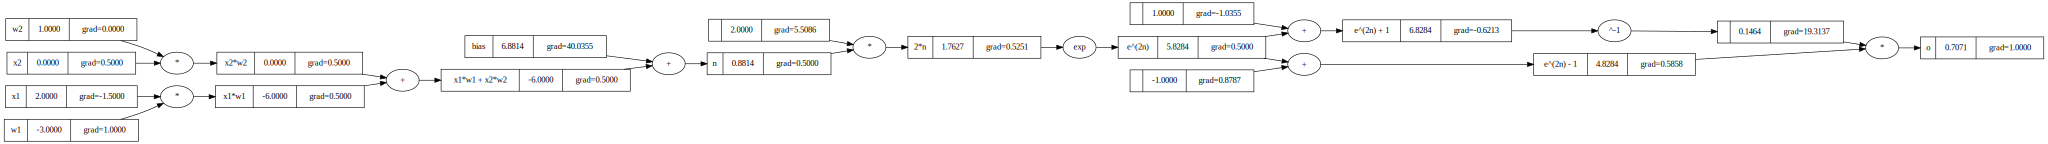

In [48]:
draw_graph(o)

## Bug

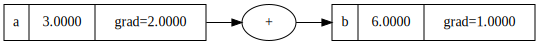

In [49]:
a = Value(3.0, label='a')
b = a + a; b.label='b';
b.backward()
draw_graph(b)

In [50]:
a = Value(3.0)
b = a + 1; b.label = 'b'
b

Value(label=b, data=4.0)

In [51]:
a = Value(7)
b = a * 3; b.label='b'
b

Value(label=b, data=21)

In [52]:
a = Value(3.0)
83 + a

Value(label=, data=86.0)

In [53]:
a = Value(2)
b = a.exp()
b

Value(label=, data=7.38905609893065)

In [54]:
# It's __truediv__, not __realdiv__ (OTL)
a = Value(2.0)
b = Value(4.0)
a / b

Value(label=, data=0.5)

In [55]:
a = Value(2.0)
b = Value(4.0)
b * a**-1

Value(label=, data=2.0)

In [56]:
a - b

Value(label=, data=-2.0)

Check that our NN computes the same values as PyTorch

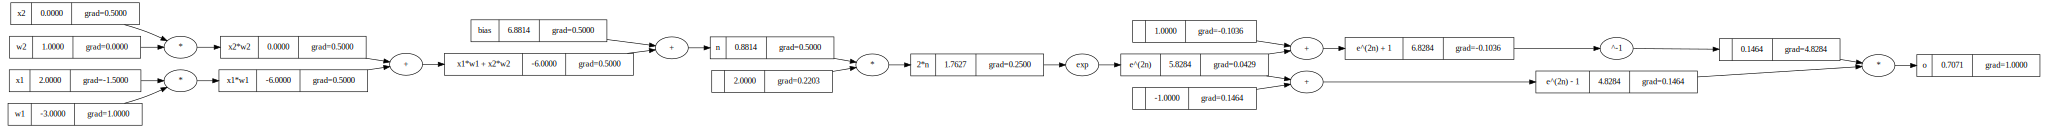

In [57]:
# Setup the neuron
# Inputs to the neuron
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Weights of the neuron, these are the "synaptic strengths" of each input
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Bias
bias_value = 6.8813735870195432
bias = Value(bias_value, label='bias')

# Do a pass-through the neuron
# Multiply each input by its weight
x1w1 = x1 * w1; x1w1.label = "x1*w1"
x2w2 = x2 * w2; x2w2.label = "x2*w2"

# Add them together
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2*w2"

# Add the bias
# This is the value before the activation function is applied
n = x1w1x2w2 + bias; n.label = 'n'

# Rewrite the original tanh function!
# ---
a = 2*n; a.label = '2*n';
b = a.exp(); b.label = 'e^(2n)'
c = b - 1; c.label='e^(2n) - 1'
d = b + 1; d.label='e^(2n) + 1'
o = c / d; o.label='o'
#---

# Apply back propagation and draw!
o.backward()
draw_graph(o)

In [58]:
import torch

In [59]:
# By default PyTorch works with 32-bit floats, here we want to match the above Python floating point type: double, 64-bit
# By default, leaf nodes do not get their gradients computed for efficiency reasons, so here we must explicitly request to compute them
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True

w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True

bias = torch.Tensor([bias_value]).double(); bias.requires_grad = True

# Can now write out the expression directly
n = w1*x1 + w2*x2 + bias
o = torch.tanh(n)

# Run backpropagation!
o.backward()

# Print out the contents of the final node
print("o", o.data.item())

print("---Gradients---")
print("w1: ", w1.grad.item())
print("x1: ", x1.grad.item())
print("--")
print("w2: ", w2.grad.item())
print("x2: ", x2.grad.item())

o 0.7071066904050358
---Gradients---
w1:  1.0000002567688737
x1:  -1.5000003851533106
--
w2:  0.0
x2:  0.5000001283844369


## Let's Create a Neural Network!!!

In [60]:
from random import randrange
a = [Value(val) for val in [randrange(-1,1) for i in range(10)]]
a

[Value(label=, data=-1),
 Value(label=, data=0),
 Value(label=, data=-1),
 Value(label=, data=-1),
 Value(label=, data=0),
 Value(label=, data=0),
 Value(label=, data=-1),
 Value(label=, data=0),
 Value(label=, data=-1),
 Value(label=, data=0)]

In [61]:
import random
from typing import List

class Neuron:
    
    # num_inputs: the number of inputs to this neural
    def __init__(self, num_inputs: int):
        self.num_inputs = num_inputs
        # A list of weights, each weight is associated to input
        self.w = [Value(value) for value in [random.uniform(-1, 1) for i in range(num_inputs)]]
        # Bias
        self.bias = Value(random.uniform(-1, 1)); self.bias.label = 'bias'
    
    # x is an input
    # __call__() is triggerd by parenthesis operation: ex. n = Neuron(2); n(x)
    # This is the forward pass of this neuron, which computes the activation
    def __call__(self, x: List[float]) -> Value:
        # w*x + b
        # where w*x is the dot product
        
        # zip() takes two lists and creates a pair of tuples, in order, from the two lists
        # a = [a1, a2, a3]; b = [b1, b2, b3]
        # zip(a, b) would be [(a1,b1), (a2,b2), (a3, b3)]
        #s = 0.0
        #for (w, x) in zip(self.w, x):
        #    s += (w * x)
        #
        #return s + self.bias
        activation = sum((wi*xi for wi,xi in zip(self.w, x)), self.bias)
        return activation.tanh()
        
        #dot_product_result = 0.0
        #for i in range(self.num_inputs):
        #    dot_product_result += (self.w[i].data * x[i])
        #
        #return dot_product_result + self.bias

    def parameters(self) -> List[Value]:
        """Return all the weights and the bias values"""
        return self.w + [self.bias]
        
# A list of Neuron objects
class Layer:
    
    # num_inputs is the dimensionality of our data
    # num_outputs is the number of Neurons in this layer
    def __init__(self, num_inputs: int, num_outputs: int):
        self.neurons = [Neuron(num_inputs) for _ in range(num_outputs)]
    
    # x is the input
    def __call__(self, x: List[float]) -> List[Value]:
        out = [n(x) for n in self.neurons]
        # Return the Value itself it it is only a layer of one Neuron, otherwise return the entire list
        out = out[0] if len(out) == 1 else out
        return out
    
    def parameters(self) -> List[Value]:
        """Returns all the parameters of each neuron in the layer into one single list"""
        return [param for neuron in self.neurons for param in neuron.parameters()]

# Multi-layer Perceptron
class MLP:
    
    # num_input defines the data input size
    # list_num_outputs: defines the size of each layer in this network
    # num_input is the input to the first layer
    # num_output becomes the num_input for the next layer
    def __init__(self, num_inputs: int, list_num_outputs: List[int]):
        nn_size = [num_inputs] + list_num_outputs
        self.layers = [Layer(nn_size[i], nn_size[i+1]) for i in range(len(nn_size)-1)]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        
        # Return the last result
        return x
    
    def parameters(self) -> List[Value]:
        """Return all the parameters of each layer into one single list"""
        #params = []
        #for layer in self.layers:
        #    params.extend(layer.parameters())
        return [param for layer in self.layers for param in layer.parameters()]

In [62]:
x = [2.0, 3.0]
n = Neuron(2)
n(x)

Value(label=, data=-0.5003861331685637)

In [63]:
# Create a layer with d-dimensional input with 3 Neurons
x = [2.0, 3.0]
layer = Layer(2, 3)
layer(x)

[Value(label=, data=0.9333916377649346),
 Value(label=, data=0.8513093201893508),
 Value(label=, data=-0.9491412024702119)]

In [64]:
# Build a multi-layer perception (MLP)
x = [2.0, 3.0, -1.0]
nn = MLP(3, [4, 4, 1])
nn(x)

Value(label=, data=-0.9443405766831491)

In [65]:
params = nn.parameters()
print(f"{len(params)} parameters")
params

41 parameters


[Value(label=, data=-0.5190705431493539),
 Value(label=, data=0.10586585801843174),
 Value(label=, data=0.7331481772960105),
 Value(label=bias, data=-0.6850022198433323),
 Value(label=, data=-0.24737079846395704),
 Value(label=, data=-0.3350661817558065),
 Value(label=, data=0.5652431449445143),
 Value(label=bias, data=-0.6761717088786439),
 Value(label=, data=0.47046911279520787),
 Value(label=, data=-0.16818281367788823),
 Value(label=, data=0.6361744538876588),
 Value(label=bias, data=-0.06871378940129191),
 Value(label=, data=0.7720739959074769),
 Value(label=, data=-0.9354017769477867),
 Value(label=, data=0.2841635726564309),
 Value(label=bias, data=0.5864228580348247),
 Value(label=, data=-0.42345811233414343),
 Value(label=, data=0.8597589493281428),
 Value(label=, data=0.4267690997290732),
 Value(label=, data=-0.14916967487036925),
 Value(label=bias, data=-0.44686418179905374),
 Value(label=, data=0.31856067505769725),
 Value(label=, data=0.663098584478693),
 Value(label=, dat

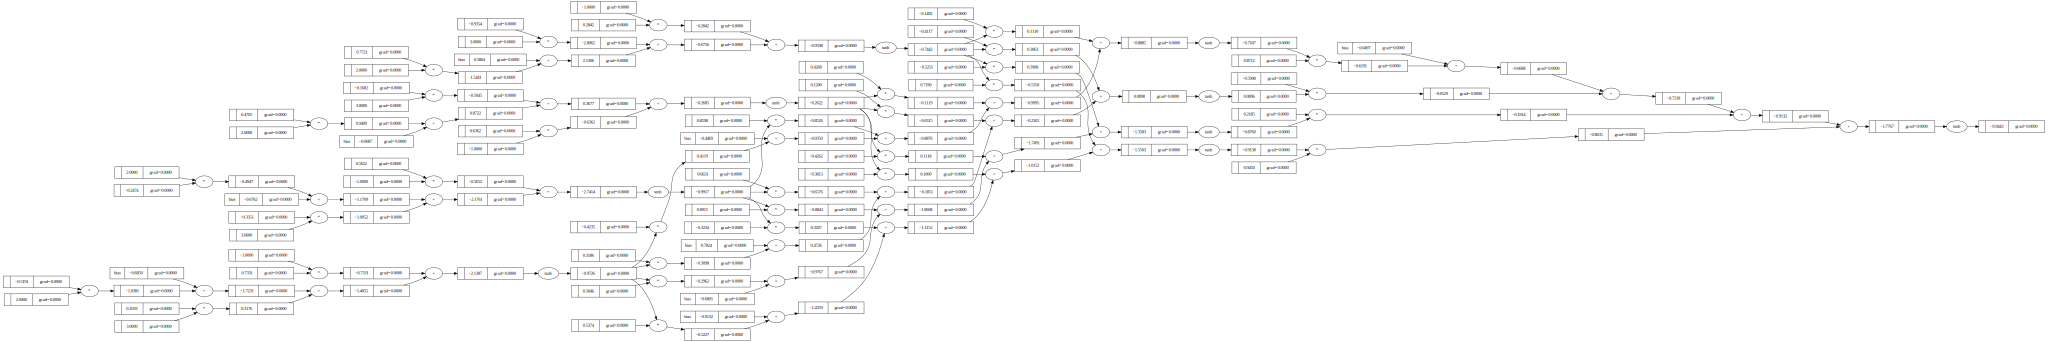

In [66]:
# ~~Damn. My draw_graph is broken :/~~
# Nevermind!!! I was passing in n(x) instead of nn(x) OTL
draw_graph(nn(x))

In [67]:
# Example dataset
# 4 possible inputs to the neural network
xs = [
    [2.0, 3.0, -1.0], # first example
    [3.0, -1, 0.5],   # second example
    [0.5, 1.0, 1.0],  # etc...
    [1.0, 1.0, -1.0]
]

# Desired outputs
# Binary classifier, outputs are only -1 and 1
ys = [
    1.0,  # desired output for the first example
    -1.0, # desired output for the second example
    -1.0, # etc...
    1.0
]

In [68]:
# Run the inputs through the neural network
ypred = [nn(x) for x in xs]
ypred

[Value(label=, data=-0.9443405766831491),
 Value(label=, data=-0.7886050124938833),
 Value(label=, data=-0.9171381585974956),
 Value(label=, data=-0.8960177853384504)]

In [69]:
# The "loss" is a single value that measures the performance of the neural net
# The goal is to minimize the loss
# Implement mean squared error of the y outputs and the y desired
# The further the value is away from the ground truth, the higher the loss
# The squared is the remove the sign (negative sign), we can also use absolute value
# If predicted and desired value is equal, their difference would be zero and the loss would also be zero
mq_error = [(y_predicted - y_ground_truth)**2 for y_ground_truth, y_predicted in zip(ys, ypred)]
mq_error

[Value(label=, data=3.780460278136561),
 Value(label=, data=0.04468784074271125),
 Value(label=, data=0.006866084760613794),
 Value(label=, data=3.594883442319722)]

In [70]:
# The final loss is the sum of the mean squared error values
# If the loss is zero, every predicted output matches its desired output
loss = sum(mq_error)
loss

Value(label=, data=7.426897645959608)

In [71]:
# Backward propagate on the loss!
loss.backward()

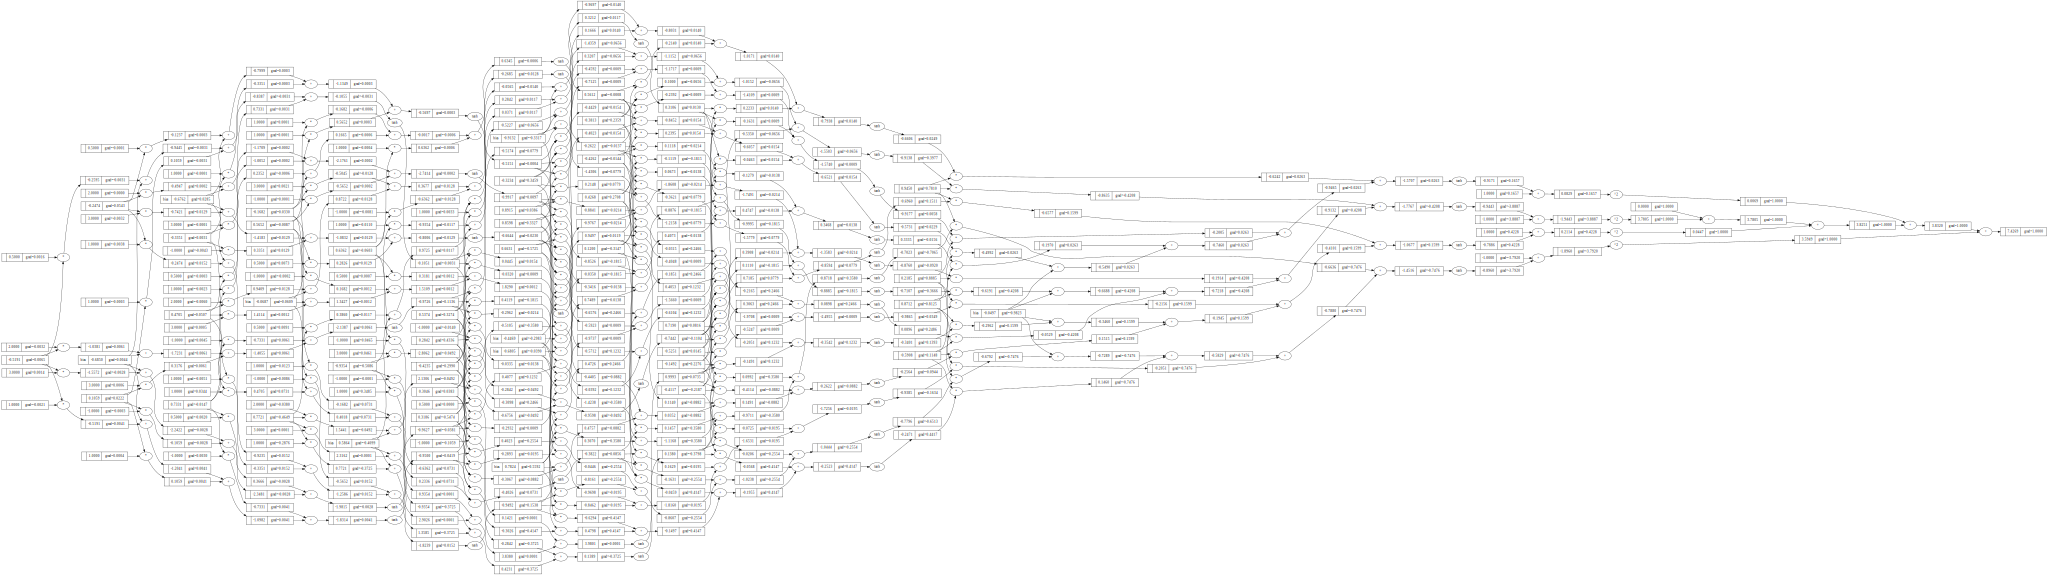

In [72]:
draw_graph(loss)

In [73]:
# If we have a negative gradient
# that means the impact of this neuron on the final loss is, if this neuron value goes up, then the loss goes down (negative grad)
nn.layers[0].neurons[0].w[0].grad

0.006455612746493979

In [74]:
nn.layers[0].neurons[0].w[0].data

-0.5190705431493539

In [75]:
# After nudging all the parameter values, let's see what that did to the neuron
nn.layers[0].neurons[0].w[0].data

-0.5190705431493539

In [76]:
# Copying the same dataset for convenience
# Example dataset
# 4 possible inputs to the neural network
xs = [
    [2.0, 3.0, -1.0], # first example
    [3.0, -1, 0.5],   # second example
    [0.5, 1.0, 1.0],  # etc...
    [1.0, 1.0, -1.0]
]

# Desired outputs
# Binary classifier, outputs are only -1 and 1
ys = [
    1.0,  # desired output for the first example
    -1.0, # desired output for the second example
    -1.0, # etc...
    1.0
]

In [77]:
# Continue doing this loop: loss.backward(), nudge values,compute loss
# Loop: forward pass, backward pass, update

# The total loss should have decreased
# This is the forward pass
ypred = [nn(x) for x in xs]
loss = sum([(y_predicted - y_ground_truth)**2 for y_ground_truth, y_predicted in zip(ys, ypred)])
loss

Value(label=, data=7.426897645959608)

In [78]:
# Backward pass
loss.backward()

In [79]:
# Go through each parameter in the neural network and slightly update each one
# based on that parameter's gradient.
# Goal is to minimize the loss
# This is gradient descent !
# We can think of the gradient as a vector pointing in the direction of *increase* loss
# So to decrease the loss, we go in the opposite direction of the gradient vector

# Another explanation:
# Overall goal is to *minimize* the total loss
# Positive gradient -> loss increases when data increases -> so we need to decrease the value of the data
# Negative gradient -> loss decreases when data increases -> so we need to increase the value of the data

# step_size is how large the updating of values is
step_size = 0.01
for p in nn.parameters():
    # We use a negative sign to go in the opposite direction of the gradient
    p.data += (step_size * -1 * p.grad)

In [80]:
# After looping a couple times, let's compare the values of the predictions to the desired target
# The lower the loss, the closer the predictions should be to the target values
# super すごい!!!
ypred

[Value(label=, data=-0.9443405766831491),
 Value(label=, data=-0.7886050124938833),
 Value(label=, data=-0.9171381585974956),
 Value(label=, data=-0.8960177853384504)]

### Training Loop

In [86]:
# Create a neural network
# Build a multi-layer perception (MLP)
x = [2.0, 3.0, -1.0]
nn = MLP(3, [4, 4, 1])
nn(x)

Value(label=, data=0.580153750775473)

In [87]:
# Get our training set (copy-pasted for convenience)
# Example dataset
# 4 possible inputs to the neural network
xs = [
    [2.0, 3.0, -1.0], # first example
    [3.0, -1, 0.5],   # second example
    [0.5, 1.0, 1.0],  # etc...
    [1.0, 1.0, -1.0]
]

# Desired outputs
# Binary classifier, outputs are only -1 and 1
ys = [
    1.0,  # desired output for the first example
    -1.0, # desired output for the second example
    -1.0, # etc...
    1.0
]

In [88]:
# Training loop
num_steps = 20
step_size = 0.05
for step in range(num_steps):
    # Forward pass
    ypred = [nn(x) for x in xs]
    loss = sum([(y_predicted - y_ground_truth)**2 for y_ground_truth, y_predicted in zip(ys, ypred)])

    # Backward pass
    # Recent the gradients!!!!
    for p in nn.parameters():
        p.grad = 0.0
    loss.backward()
    
    # Update
    for p in nn.parameters():
        # We use a negative sign to go in the opposite direction of the gradient
        p.data += (step_size * -1 * p.grad)
    
    print(f"Step {step}: loss={loss.data}")

Step 0: loss=5.324283193809241
Step 1: loss=3.646868520190629
Step 2: loss=3.0486217108497065
Step 3: loss=1.8807941440422338
Step 4: loss=0.9149324091652473
Step 5: loss=0.5283488904126886
Step 6: loss=0.35641477026211343
Step 7: loss=0.265828037316315
Step 8: loss=0.21007573267190088
Step 9: loss=0.17268102275885683
Step 10: loss=0.14602332586207165
Step 11: loss=0.12614169181205104
Step 12: loss=0.11078999101563251
Step 13: loss=0.0986060301481508
Step 14: loss=0.08871857856679893
Step 15: loss=0.0805458990889749
Step 16: loss=0.07368549852634418
Step 17: loss=0.0678504670411609
Step 18: loss=0.06283102854696154
Step 19: loss=0.05847041448225045


In [89]:
ypred

[Value(label=, data=0.9440062281570345),
 Value(label=, data=-0.8429152040617164),
 Value(label=, data=-0.8947812469524653),
 Value(label=, data=0.8600411028580245)]